## Beschreibung der Aufgabe

In dieser Aufgabe implementieren Sie ein Programm, das lernt, Punkte in $\mathbb{R}^3$ zu klassifizieren.

### Aufgabe 1: Einlesen der Trainingsdaten

Verwenden Sie pandas, um den Datensatz `train.csv` in einen DataFrame `df` zu laden. Wenn Sie `df.head()` ausführen, erhalten Sie:

```
 	  x1 	x2 	x3 	y
0 	2.351230 	2.902232 	2.457985 	0.0
1 	3.076945 	2.834429 	1.834440 	0.0
2 	3.116672 	3.542658 	1.668031 	0.0
3 	2.383648 	2.672314 	1.670679 	0.0
4 	2.171093 	1.647107 	0.780299 	0.0
```

Jede Zeile stellt einen Punkt dar. Die letzte Spalte `y` ist eine Ganzzahl (0 oder 1), welche die Klasse repräsentiert. Alle anderen Spalten beschreiben die Koordinate des Punktes.

Anschliessend erstellen Sie zwei DataFrames `X` und `y`. Hierbei soll `y` nur die Labels enthalten und `X` alle anderen Spalten. Soweit ist alles bereits im Code vorhanden.

In [1]:
import pandas as pd
import numpy as np

# Hint: This one we already solved for you ;)
df = pd.read_csv("train.csv")  #make sure "train.csv" is located in the right place!

X = df.drop(['y'], axis=1)
y = df['y']

df.head()

,x1,x2,x3,y
0,2.351230,2.902232,2.457985,0.0
1,3.076945,2.834429,1.834440,0.0
2,3.116672,3.542658,1.668031,0.0
3,2.383648,2.672314,1.670679,0.0
4,2.171093,1.647107,0.780299,0.0


# Allways have a look at the data

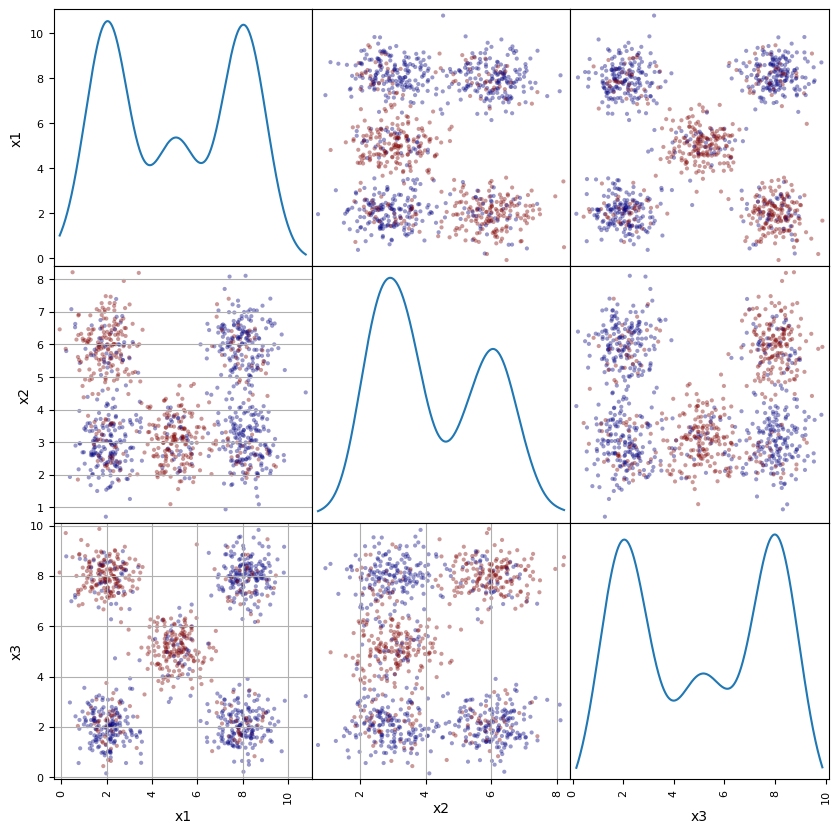

In [2]:
axes=pd.plotting.scatter_matrix(X, c=y, cmap='jet', alpha=0.4, figsize=(10, 10), diagonal='kde')
axes[1,0].grid()
axes[2,0].grid();axes[2,1].grid()


### Note the clusters in the picture above

### Aufgabe 2: Datensatz aufteilen

Teilen Sie nun `(X, y)` mithilfe der Funktion `train_test_split` von Scikit in einen Trainingsdatensatz `(X_train, y_train)` und einen Testdatensatz `(X_test, y_test)` auf. Anhand dieser Daten werden Sie in den kommenden Schritten Ihr Modell trainieren bzw. validieren. Nutzen Sie 80% der Punkte in `(X, y)` zur Erzeugung der Trainingsdaten und 20% für die Testdaten. 

Bitte ändern Sie $\textcolor{red}{NICHT}$ den Aufruf der Funktion `np.random.seed` und spezifizieren Sie $\textcolor{red}{KEINEN}$`random_state` beim Aufteilen der Daten!

In [3]:
np.random.seed(42) #don't change!
from sklearn.model_selection import train_test_split

# Hint: this function takes as parameter X, y, and a 'test_size' ;)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Aufgabe 3: Modell auswählen und trainieren

Verwenden Sie `GridSearch` und das `DecisionTree` - Modell, um die Punkte in `X_test` zu klassifizieren, und erstellen Sie einen DataFrame `y_pred`, der die Vorhersagen des Schätzers für jeden Punkt in `X_test` enthält. Die Dokumentation zum `DecisionTree`-Modell finden Sie [hier](https://scikit-learn.org/stable/modules/tree.html).

Sie dürfen auch `GridSearch` benutzen, um den Parameter `max_depth` des `DecisionTrees` zu optimieren. Dieser Parameter ist eine Ganzzahl, die die Tiefe des Baumes bestimmt. Beachten Sie, dass je tiefer der Baum, desto komplexer wird er. Daher neigen tiefe Bäume mehr zu Overfitting.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': range(1, 11)}, cv=5).fit(X_train, y_train)
print(model.best_params_)
# Hint: To train a model, use the method 'fit' with some X and some y.

{'max_depth': 2}


### Aufgabe 4: Validierung

Bewerten Sie die Genauigkeit der vom Schätzer vorgenommenen Vorhersagen anhand von `y_test` als Grundlage. Verwenden Sie dafür die Funktion `accuracy_score` von Scikit. Dies dient Ihnen als Absicherung, dass Ihr Algorithmus funktioniert.

In [5]:
from sklearn.metrics import accuracy_score

# Hint: Here you use your estimator to 'predict' the labels for your
# test data.
y_pred = model.predict(X_test)

# Hint: Call accuracy_score with the following arguments:
# 1. the true labels.
# 2. the labels you predicted.
acc = accuracy_score(y_test, y_pred)

print("Accuracy of estimator on test data: {:.3f}".format(acc))

Accuracy of estimator on test data: 0.815


### Aufgabe 5: Bewertung

Verwenden Sie dann wiederum pandas, um den Datensatz `X_final.csv` in einen DataFrame `X_final` zu laden.

Beachten Sie, dass dies ein Datensatz ist, der Punkte beschreibt, ohne jedoch deren Labels anzugeben. Diese Labels sind vor Ihnen verborgen. Verwenden Sie Ihren Schätzer, um diese Punkte zu klassifizieren. Tragen Sie zuletzt Ihre Klassifizierung der Punkte in Moodle ein!

In [6]:
X_final = pd.read_csv("X_final.csv")
X_final.head()

,x1,x2,x3
0,7,4,8
1,5,4,5
2,3,7,8
3,3,3,1
4,4,4,4


In [7]:
y_final = model.predict(X_final).astype(int) #classify the points in X_final with the help of your DecisionTreeClassifier
for i, yc in enumerate(y_final):
    print(f"Der Punkt in der Reihe {i} ist vom Typ {yc}.")

Der Punkt in der Reihe 0 ist vom Typ 0.
Der Punkt in der Reihe 1 ist vom Typ 1.
Der Punkt in der Reihe 2 ist vom Typ 1.
Der Punkt in der Reihe 3 ist vom Typ 0.
Der Punkt in der Reihe 4 ist vom Typ 1.
Der Punkt in der Reihe 5 ist vom Typ 1.
Der Punkt in der Reihe 6 ist vom Typ 1.
Der Punkt in der Reihe 7 ist vom Typ 1.
Der Punkt in der Reihe 8 ist vom Typ 0.
Der Punkt in der Reihe 9 ist vom Typ 0.


## Analyse the solution

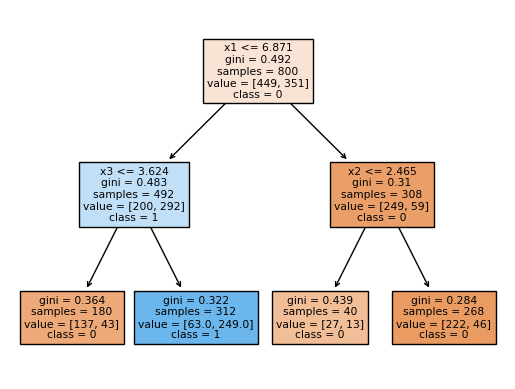

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model.best_estimator_, filled=True, feature_names=X.columns, class_names=['0', '1'])
pass

### It seems that $x_2$ plays no role to the classification and the top left quadrant defines the class $1$
Let's try to better visualize the decision tree. From the tree information (see plot above) we can see that the decision boundary for class $1$ is at approximately
$$x_1 \le 6.5$$
$$x_3 \ge 3.5$$

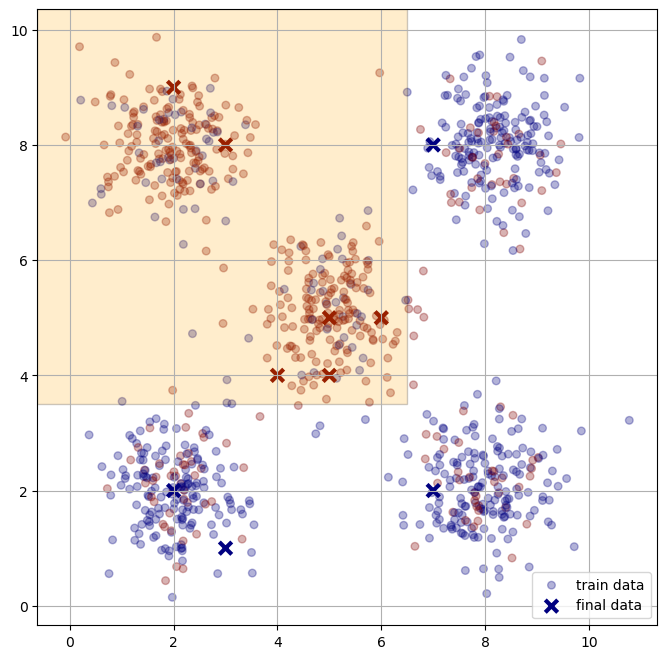

In [9]:
split_x1 = 6.5 #6.871 
split_x3 = 3.5 #3.624
fig,ax=plt.subplots(figsize=(8, 8))
ax.scatter(X['x1'], X['x3'], c=y, cmap='jet', s=30, marker='o', alpha=0.3, label='train data')
ax.scatter(X_final['x1'], X_final['x3'], c=y_final, cmap='jet', s=80, marker='x', lw=3, label='final data')
#plot the decision boundary
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
rect=plt.Rectangle((x_lim[0], split_x3), split_x1-x_lim[0], y_lim[1]-split_x3, fill=True, facecolor='orange', edgecolor="black", alpha=0.2)
ax.add_patch(rect)

ax.grid()
ax.legend()
pass

## Check against other classifiers

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rfc = RandomForestClassifier(n_estimators=300).fit(X_train, y_train)
gbc = GradientBoostingClassifier(n_estimators=300).fit(X_train, y_train)

y_final_rfc = rfc.predict(X_final).astype(int)
y_final_gbc = gbc.predict(X_final).astype(int)

res=pd.DataFrame({'Decision Tree': y_final, 'Random Forest': y_final_rfc, 'Gradient Boosting': y_final_gbc})
display(res)

,Decision Tree,Random Forest,Gradient Boosting
0,0,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1
5,1,1,1
6,1,1,1
7,1,1,1
8,0,0,0
9,0,0,0


## All classifiers seem to agree :)